<h3 align='center'> Time Series Using Statsmodels </h3>

<h4> Statsmodel libraries can be used for time series forecasting. </h4>

Statsmodels is the Python modeule that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration 

In this whole section, we will go through:

   - <h5> Introduction to Statsmodels </h5>
   - ETS Decomposition
   - Moving Averages
   - Holt WInter Methods
   - Statsmodels Time Series Exercises
  

<h4> 1. Introduction to Statsmodels </h4>

 - Here will learn how to call a function test from Statsmodels that have a lot of statistical tests built in.
 - Learn about Hodrick-Prescott filter

Key important factors to understand in time series forecasting

 - TRENDS : 'Upward' trend - slope is positive, 'Horizontal/Stationary' trend - if you were to avergae it out in the middle (constant line with slope almost zero, 'Downward' trend - negative slope, fall.
 - SEASONALITY : It is a repeating trend. Ex. snowboarding search on google - there is a upward trend in winter and downward trend in summer and it is repeating trend in every known cycle.
 - Cyclical : Trends with no set repetition. Ex: stocks, real world datasets in general

<h5> Hodrick-Prescott filter </h5>

It separates a time series ($y_t$) into a trend component ($\tau_t$) and a cyclical component ($c_t$)

<h4 align='center'> $ y_t=\tau_t + c_t $ </h4>

where these two components can be determined by minimizing following quadratic loss function ($\lambda$) is a soothing parameter

<h4 align='center'> $ \mathrm{min}_{\tau_t} \sum_{t=1}^T c_t^2 + \lambda \sum_{t=1}^T [(\tau_t-\tau_{t-1})-(\tau_{t-1}-\tau_{t-2})]^2 $ </h4>

$\lambda$ value handles variations in the growth rate of the trend component. Recommended values for $\lambda$ are 1600 for quarterly data, 6.25 for annual data and 129600 for monthly data

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
#read dataset
df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


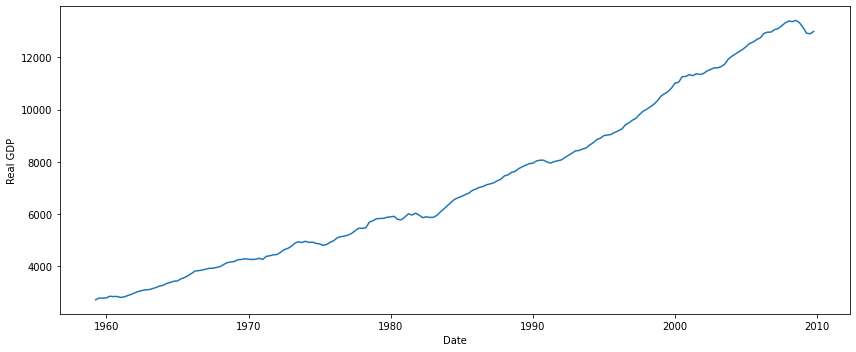

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5));
plt.plot(df['realgdp']);
plt.xlabel('Date')
plt.ylabel('Real GDP')
plt.tight_layout()

In [5]:
#Using Hodrick-Prescott model

from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle,gdp_trend = hpfilter(df['realgdp'],lamb=1600) #quarterly data as it returns a tuple (cyclical and trend component)

In [6]:
type(gdp_trend)

pandas.core.series.Series

In [7]:
# inserting gdp trend into dataframe

df['trend'] = gdp_trend
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


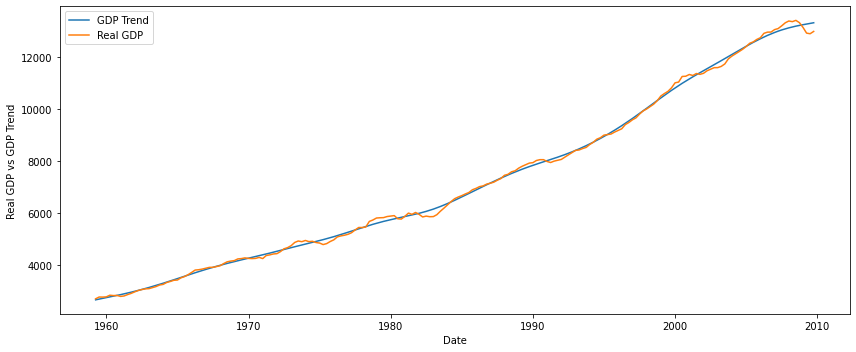

In [8]:
plt.figure(figsize=(12,5));
plt.plot(df['trend'],label='GDP Trend');
plt.plot(df['realgdp'],label='Real GDP');
plt.xlabel('Date')
plt.ylabel('Real GDP vs GDP Trend')
plt.tight_layout()
plt.legend()

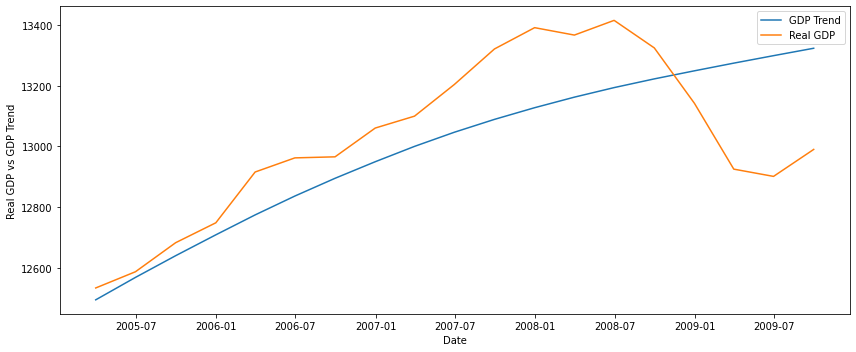

In [9]:
plt.figure(figsize=(12,5));
plt.plot(df['trend']['2005-01-01':],label='GDP Trend');
plt.plot(df['realgdp']['2005-01-01':],label='Real GDP');
plt.xlabel('Date')
plt.ylabel('Real GDP vs GDP Trend')
plt.tight_layout()
plt.legend()